In [53]:
import pandas as pd

In [ ]:
flights_all=pd.read_csv('./flights.csv',dtype={"ORIGIN_AIRPORT": str, "DESTINATION_AIRPORT": str})

In [73]:
flights_peak = flights_all[(flights_all['MONTH']>4) & (flights_all['MONTH']<12)  ]
flights = flights_peak.groupby('AIRLINE')['FLIGHT_NUMBER','DEPARTURE_DELAY','ARRIVAL_DELAY','DIVERTED','CANCELLED','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

airlines_names =  {'AA': "American Airlines", 'AS': "Alaska Airlines",'B6':'Jetblue Airways ','DL':'Delta Air Lines','EV':'ExpressJet Airlines','F9':'Frontier Airlines','HA':'Hawaiian Airlines','MQ':'Envoy Air','NK':'Spirit Airlines','OO':'SkyWest Airlines','UA':'United Airlines','VX':'Virgin America','WN':'Southwest Airlines','US':'US Airways'}
flights = pd.DataFrame({'Airline Name': airlines_names,'Flights Total' : flights_peak.groupby('AIRLINE')['FLIGHT_NUMBER'].count()}).reset_index()
flights

,AIRLINE,Airline Name,Flights Total
0,AA,American Airlines,474792
1,AS,Alaska Airlines,104361
2,B6,Jetblue Airways,157721
3,DL,Delta Air Lines,533601
4,EV,ExpressJet Airlines,329288
5,F9,Frontier Airlines,55980
6,HA,Hawaiian Airlines,45387
7,MQ,Envoy Air,162958
8,NK,Spirit Airlines,70980
9,OO,SkyWest Airlines,349253


In [83]:
c = flights_peak[flights_peak['CANCELLATION_REASON'] == 'A']
#cancellations.head()
cancellations = pd.DataFrame({'Canceled Flights Total' : c.groupby('AIRLINE')['FLIGHT_NUMBER'].count()}).reset_index()
cancellations = pd.merge(flights, cancellations, on='AIRLINE')
cancellations

,AIRLINE,Airline Name,Flights Total,Canceled Flights Total
0,AA,American Airlines,474792,1841
1,AS,Alaska Airlines,104361,176
2,B6,Jetblue Airways,157721,561
3,DL,Delta Air Lines,533601,216
4,EV,ExpressJet Airlines,329288,1343
5,F9,Frontier Airlines,55980,137
6,HA,Hawaiian Airlines,45387,112
7,MQ,Envoy Air,162958,935
8,NK,Spirit Airlines,70980,517
9,OO,SkyWest Airlines,349253,1998


In [115]:
print("Cancellations by airlines")
cancl = cancellations['Canceled Flights Total'].iloc[:14]/flights['Flights Total'].iloc[:14]*100
cancl_stats =  pd.DataFrame({'AIRLINE':cancellations['AIRLINE'],'Airline Name':cancellations['Airline Name'],'Cancellation %':cancl})

cancl_stats


Cancellations by airlines


,AIRLINE,Airline Name,Cancellation %
0,AA,American Airlines,0.387749
1,AS,Alaska Airlines,0.168645
2,B6,Jetblue Airways,0.355691
3,DL,Delta Air Lines,0.040480
4,EV,ExpressJet Airlines,0.407850
5,F9,Frontier Airlines,0.244730
6,HA,Hawaiian Airlines,0.246767
7,MQ,Envoy Air,0.573767
8,NK,Spirit Airlines,0.728374
9,OO,SkyWest Airlines,0.572078


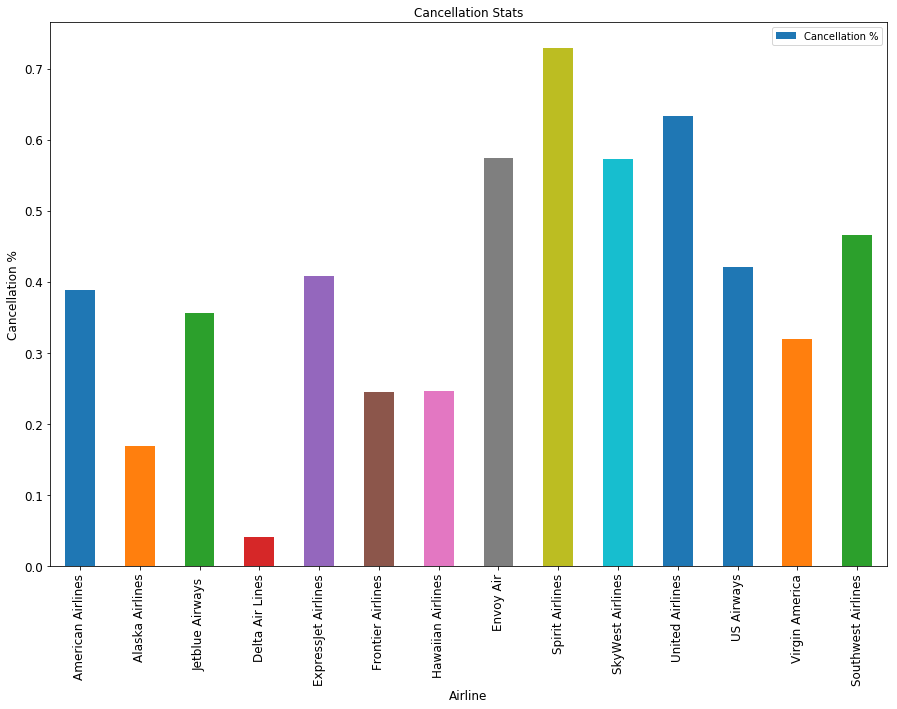

In [116]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
ax = cancl_stats.plot(x='Airline Name', y='Cancellation %',kind='bar', title ="Cancellation Stats", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Airline", fontsize=12)
ax.set_ylabel("Cancellation %", fontsize=12)
plt.show()

In [122]:
reliability_by_cancl = (flights['Flights Total'].iloc[:14]- cancellations['Canceled Flights Total'].iloc[:14])/flights['Flights Total'].iloc[:14]*100
cancl_stats =  pd.DataFrame({'AIRLINE':cancellations['AIRLINE'],'Airline Name':cancellations['Airline Name'],'Reliability by Cancellation %':reliability_by_cancl})

cancl_stats

,AIRLINE,Airline Name,Reliability by Cancellation %
0,AA,American Airlines,99.612251
1,AS,Alaska Airlines,99.831355
2,B6,Jetblue Airways,99.644309
3,DL,Delta Air Lines,99.959520
4,EV,ExpressJet Airlines,99.592150
5,F9,Frontier Airlines,99.755270
6,HA,Hawaiian Airlines,99.753233
7,MQ,Envoy Air,99.426233
8,NK,Spirit Airlines,99.271626
9,OO,SkyWest Airlines,99.427922


In [110]:
cancl_stats.describe()

,Reliability by Cancellation %
count,14.000000
mean,99.602584
std,0.189295
min,99.271626
25%,99.454678
50%,99.602201
75%,99.735195
max,99.959520


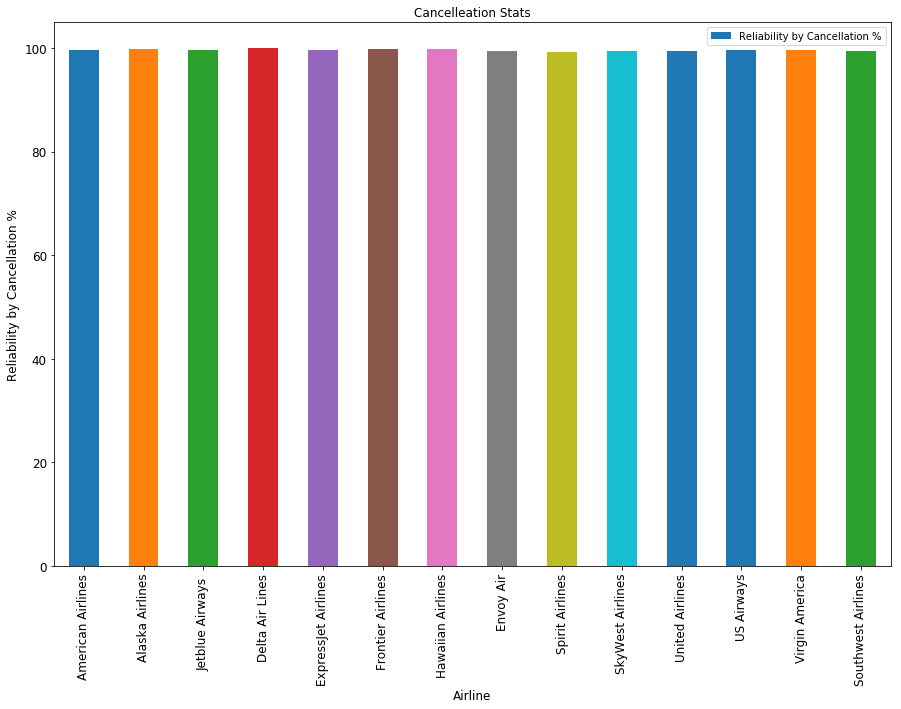